In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from time import sleep
from ta import momentum, trend, volume
from binance import Client
from key import PUB_KEY, SEC_KEY

# Get Historical Data

In [2]:
# Connecting to Binance
client = Client(PUB_KEY, SEC_KEY)
# Get historical data
raw_df = pd.DataFrame(client.get_historical_klines('BTCUSDT',
                             Client.KLINE_INTERVAL_1HOUR,
                                      str(365) + ' days ago UTC'))

# First 6 column represent Time and OHLCV values
raw_df = raw_df.iloc[:, :6]
raw_df.columns = ['Time', 'Open', 'High', 'Low', 'Close', 'Volume']

# Convert first column into datetime
raw_df['Time'] = pd.to_datetime(raw_df['Time'], unit='ms')
for column in raw_df.columns:
    if column != 'Time':
        raw_df[column] = raw_df[column].astype(float)

# Set Time as index
raw_df.set_index('Time', inplace=True)
raw_df = raw_df.iloc[:-1]

# Generate Technical Indicators

In [3]:
def get_ta(raw_df):
    df = raw_df.copy()
    df['SMA50'] = df['Close'].rolling(50).mean()
    df['SMA200'] = df['Close'].rolling(200).mean()
    df['RSI'] = momentum.rsi(df['Close'])
    df['MACD'] = trend.macd(df['Close'])
    df['MACD_sig'] = trend.macd_signal(df['Close'])
    df['MACD_diff'] = trend.macd_diff(df['Close'])
    df['Momentum'] = (df['Close'] - df['Close'].shift(12))/df['Close'].shift(12)
    df['ADX'] = trend.adx(df['High'], df['Low'], df['Close'])
    df['-DI'] = trend.adx_neg(df['High'], df['Low'], df['Close'])
    df['+DI'] = trend.adx_pos(df['High'], df['Low'], df['Close'])
    df.dropna(inplace=True)
    return df


In [4]:
df = get_ta(raw_df)

# Generate Trading Signals

For each TAs, a buy, hold and sell signal will be generated. They will bear the weight of 1, 0 and -1 respectively

In [5]:
df.dropna(inplace=True)
df

,Open,High,Low,Close,Volume,SMA50,SMA200,RSI,MACD,MACD_sig,MACD_diff,Momentum,ADX,-DI,+DI
Time,,,,,,,,,,,,,,,
2023-08-16 01:00:00,29224.37,29249.02,29184.96,29245.47,955.88997,29375.3940,29452.05480,42.903863,-51.740685,-42.480581,-9.260105,-0.004424,21.063719,25.891642,14.530904
2023-08-16 02:00:00,29245.46,29257.46,29223.39,29255.14,1199.36652,29375.1768,29452.85835,44.017266,-48.313867,-43.647238,-4.666629,-0.006811,21.381439,25.047226,14.864919
2023-08-16 03:00:00,29255.14,29255.14,29223.16,29228.51,794.90806,29374.3870,29453.22635,41.610793,-47.202783,-44.358347,-2.844436,-0.003551,21.679624,24.270786,14.390498
2023-08-16 04:00:00,29228.51,29235.54,29204.67,29208.37,1056.58733,29372.1546,29453.27325,39.836943,-47.400961,-44.966870,-2.434092,-0.002542,22.216467,25.414798,13.928388
2023-08-16 05:00:00,29208.36,29209.24,29138.16,29142.23,999.30146,29367.0010,29453.00230,34.617793,-52.292173,-46.431930,-5.860243,-0.006599,23.520245,30.441622,12.901102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-06 12:00:00,55210.00,55468.00,54677.49,54772.01,2140.16498,55460.1816,62298.84635,47.537022,68.939330,31.869372,37.069958,-0.022592,24.777086,22.467292,16.206194
2024-08-06 13:00:00,54772.01,55438.03,54371.94,55204.00,3421.11371,55346.3416,62226.55600,50.735954,67.945539,39.084605,28.860934,-0.009331,24.505754,22.935467,14.981149
2024-08-06 14:00:00,55203.99,56605.55,55152.00,56132.01,6015.81670,55247.7418,62159.27600,56.826214,140.421908,59.352066,81.069842,0.005131,22.901883,20.644134,21.508926


In [6]:
def get_signal(df):

    #SMA Golden Cross & Death Cross
    sma_buy_cond = (df['SMA50'] > df['SMA200']) & (df['SMA50'].shift(1) < df['SMA200'])
    sma_sell_cond = (df['SMA50'] < df['SMA200']) & (df['SMA50'].shift(1) > df['SMA200'])
    sma_buy_cond_sub = (df['SMA50'] > df['SMA200'])
    sma_sell_cond_sub = (df['SMA50'] < df['SMA200'])
    df['Signal_sma'] = np.where(sma_buy_cond, 2, np.where(sma_sell_cond, -2, np.where(sma_buy_cond_sub, 1, np.where(sma_sell_cond_sub, -1, 0))))

    # MACD Below 0 Cross
    macd_buy_cond = (df['MACD_diff'] > 0) & (df['MACD_diff'].shift(1) < 0) & (df['MACD'] < 0) &(df['MACD_sig'] < 0)
    macd_sell_cond = (df['MACD_diff'] < 0) & (df['MACD_diff'].shift(1) > 0) & (df['MACD'] > 0) &(df['MACD_sig'] > 0)
    macd_buy_cond_sub = (df['MACD_diff'] > 0) & (df['MACD_diff'].shift(1) < df['MACD_diff'])
    macd_sell_cond_sub = (df['MACD_diff'] < 0) & (df['MACD_diff'].shift(1) > df['MACD_diff'])
    df['Signal_macd'] = np.where(macd_buy_cond, 2, np.where(macd_sell_cond, -2, np.where(macd_buy_cond_sub, 1, np.where(macd_sell_cond_sub, -1, 0))))

    # RSI Overbought & Oversold
    rsi_buy_cond = (df['RSI'] > 30) & (df['RSI'].shift(1) < 30)
    rsi_sell_cond = (df['RSI'] < 70) & (df['RSI'].shift(1) > 70)
    rsi_buy_cond_sub = (df['RSI'] >= 50) & (df['RSI'].shift(1) < df['RSI'])
    rsi_sell_cond_sub = (df['RSI'] < 50) & (df['RSI'].shift(1) > df['RSI'])
    df['Signal_rsi'] = np.where(rsi_buy_cond, 2, np.where(rsi_sell_cond, -2, np.where(rsi_buy_cond_sub, 1, np.where(rsi_sell_cond_sub, -1, 0))))

    # ADX Trend Confirmation
    adx_buy_cond = (df['ADX'] > 25) & (df['+DI'] > df['-DI'])
    adx_sell_cond = (df['ADX'] > 25) & (df['-DI'] > df['+DI'])
    df['Signal_adx'] = np.where(adx_buy_cond, 1, np.where(adx_sell_cond, -1, 0))

    # Momentum Trade
    momentum_buy_cond = (df['Momentum'] > 0) & (df['Momentum'].shift(1) > 0) & (df['Momentum'].shift(2) > 0) & (df['Momentum'].shift(3) > 0) & (df['Momentum'].shift(4) > 0) \
                        & (df['Momentum'].shift(5) > 0) & (df['Momentum'].shift(6) > 0) & (df['Momentum'].shift(7) > 0) & (df['Momentum'].shift(8) > 0) & (df['Momentum'].shift(9) > 0)
    momentum_sell_cond = (df['Momentum'] < 0) & (df['Momentum'].shift(1) < 0) & (df['Momentum'].shift(2) < 0) & (df['Momentum'].shift(3) < 0) & (df['Momentum'].shift(4) < 0) \
                        & (df['Momentum'].shift(5) < 0) & (df['Momentum'].shift(6) < 0) & (df['Momentum'].shift(7) < 0) & (df['Momentum'].shift(8) < 0) & (df['Momentum'].shift(9) < 0)
    momentum_buy_cond_sub = (df['Momentum'] > 0) & (df['Momentum'].shift(1) > 0) & (df['Momentum'].shift(2) > 0) & (df['Momentum'].shift(3) > 0) & (df['Momentum'].shift(4) > 0)
    momentum_sell_cond_sub = (df['Momentum'] < 0) & (df['Momentum'].shift(1) < 0) & (df['Momentum'].shift(2) < 0) & (df['Momentum'].shift(3) < 0) & (df['Momentum'].shift(4) < 0)
    df['Signal_momentum'] = np.where(momentum_buy_cond, 2, np.where(momentum_sell_cond, -2, np.where(momentum_buy_cond_sub, 1, np.where(momentum_sell_cond_sub, -1, 0))))

    df['Buy/Sell Consensus'] = df['Signal_sma'] + df['Signal_macd'] + df['Signal_rsi'] + df['Signal_adx'] + df['Signal_momentum']

    return df

In [7]:
df = get_signal(df)
df

,Open,High,Low,Close,Volume,SMA50,SMA200,RSI,MACD,MACD_sig,...,Momentum,ADX,-DI,+DI,Signal_sma,Signal_macd,Signal_rsi,Signal_adx,Signal_momentum,Buy/Sell Consensus
Time,,,,,,,,,,,,,,,,,,,,,
2023-08-16 01:00:00,29224.37,29249.02,29184.96,29245.47,955.88997,29375.3940,29452.05480,42.903863,-51.740685,-42.480581,...,-0.004424,21.063719,25.891642,14.530904,-1,0,0,0,0,-1
2023-08-16 02:00:00,29245.46,29257.46,29223.39,29255.14,1199.36652,29375.1768,29452.85835,44.017266,-48.313867,-43.647238,...,-0.006811,21.381439,25.047226,14.864919,-1,0,0,0,0,-1
2023-08-16 03:00:00,29255.14,29255.14,29223.16,29228.51,794.90806,29374.3870,29453.22635,41.610793,-47.202783,-44.358347,...,-0.003551,21.679624,24.270786,14.390498,-1,0,-1,0,0,-2
2023-08-16 04:00:00,29228.51,29235.54,29204.67,29208.37,1056.58733,29372.1546,29453.27325,39.836943,-47.400961,-44.966870,...,-0.002542,22.216467,25.414798,13.928388,-1,0,-1,0,0,-2
2023-08-16 05:00:00,29208.36,29209.24,29138.16,29142.23,999.30146,29367.0010,29453.00230,34.617793,-52.292173,-46.431930,...,-0.006599,23.520245,30.441622,12.901102,-1,-1,-1,0,-1,-4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-06 12:00:00,55210.00,55468.00,54677.49,54772.01,2140.16498,55460.1816,62298.84635,47.537022,68.939330,31.869372,...,-0.022592,24.777086,22.467292,16.206194,-1,0,-1,0,0,-2
2024-08-06 13:00:00,54772.01,55438.03,54371.94,55204.00,3421.11371,55346.3416,62226.55600,50.735954,67.945539,39.084605,...,-0.009331,24.505754,22.935467,14.981149,-1,0,1,0,0,0
2024-08-06 14:00:00,55203.99,56605.55,55152.00,56132.01,6015.81670,55247.7418,62159.27600,56.826214,140.421908,59.352066,...,0.005131,22.901883,20.644134,21.508926,-1,1,1,0,0,1


# Run Test Trades on Historcical Data

In [8]:
historical_df = df[df['Buy/Sell Consensus'] != 0]
historical_df

,Open,High,Low,Close,Volume,SMA50,SMA200,RSI,MACD,MACD_sig,...,Momentum,ADX,-DI,+DI,Signal_sma,Signal_macd,Signal_rsi,Signal_adx,Signal_momentum,Buy/Sell Consensus
Time,,,,,,,,,,,,,,,,,,,,,
2023-08-16 01:00:00,29224.37,29249.02,29184.96,29245.47,955.88997,29375.3940,29452.05480,42.903863,-51.740685,-42.480581,...,-0.004424,21.063719,25.891642,14.530904,-1,0,0,0,0,-1
2023-08-16 02:00:00,29245.46,29257.46,29223.39,29255.14,1199.36652,29375.1768,29452.85835,44.017266,-48.313867,-43.647238,...,-0.006811,21.381439,25.047226,14.864919,-1,0,0,0,0,-1
2023-08-16 03:00:00,29255.14,29255.14,29223.16,29228.51,794.90806,29374.3870,29453.22635,41.610793,-47.202783,-44.358347,...,-0.003551,21.679624,24.270786,14.390498,-1,0,-1,0,0,-2
2023-08-16 04:00:00,29228.51,29235.54,29204.67,29208.37,1056.58733,29372.1546,29453.27325,39.836943,-47.400961,-44.966870,...,-0.002542,22.216467,25.414798,13.928388,-1,0,-1,0,0,-2
2023-08-16 05:00:00,29208.36,29209.24,29138.16,29142.23,999.30146,29367.0010,29453.00230,34.617793,-52.292173,-46.431930,...,-0.006599,23.520245,30.441622,12.901102,-1,-1,-1,0,-1,-4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-06 11:00:00,55062.00,55400.85,54868.36,55210.01,1488.38598,55580.9816,62371.82630,50.632442,113.189450,22.601883,...,0.022052,25.437658,22.367186,17.173100,-1,0,1,-1,2,1
2024-08-06 12:00:00,55210.00,55468.00,54677.49,54772.01,2140.16498,55460.1816,62298.84635,47.537022,68.939330,31.869372,...,-0.022592,24.777086,22.467292,16.206194,-1,0,-1,0,0,-2
2024-08-06 14:00:00,55203.99,56605.55,55152.00,56132.01,6015.81670,55247.7418,62159.27600,56.826214,140.421908,59.352066,...,0.005131,22.901883,20.644134,21.508926,-1,1,1,0,0,1


In [9]:
balance = 1000
open_trade = False
bought_price = 0
# sell_price = 0
coin = 0

In [10]:
for idx, row in historical_df.iterrows():
    if (row['Buy/Sell Consensus'] >= 4) & (open_trade == False):
        coin = (balance / row['Close']) *0.999
        bought_price = row['Close']
        open_trade = True
    elif (row['Buy/Sell Consensus'] <= -4) & (open_trade == True):
        open_trade = False
        print(f"PnL:{(row['Close']-bought_price)/bought_price * 100}")
        balance = coin * row['Close'] *0.999
        coin = 0

PnL:-0.3219808660101234
PnL:-3.1785011351789882
PnL:-0.18482503796133637
PnL:-0.36582888120315915
PnL:-0.7173913799438818
PnL:-1.5050221956997
PnL:1.6375172912450837
PnL:3.1820468166928753
PnL:30.675687874241852
PnL:1.009768031905576
PnL:0.08367125580034646
PnL:-1.535426150702849
PnL:0.07669769253660974
PnL:14.153244856875347
PnL:-3.7793485197859016
PnL:-0.6816338395322873
PnL:-1.327815678178565
PnL:-0.9212212491761984
PnL:3.5727616057655642
PnL:-8.882391409609335
PnL:-0.5502101118303576
PnL:1.2848589752145836
PnL:-1.7544757859002704
PnL:17.618680130602552
PnL:-0.591149951406632
PnL:29.301481784764572
PnL:-3.1999925179694704
PnL:-0.6790704552894047
PnL:-2.9676460925170023
PnL:2.9797250695253648
PnL:-5.989042575914985
PnL:-1.3026052412773657
PnL:-1.1001589825119238
PnL:-1.7619153185392362
PnL:8.05111190777714
PnL:-0.548043958791738
PnL:0.33402053213037775
PnL:-1.8992292494625898
PnL:-0.8081479917569347
PnL:-1.8745896209800994
PnL:-1.117245244605172
PnL:-1.6963676655873314
PnL:-2.7189426

In [11]:
balance

1667.597590510114

In [12]:
1 - 1/1000

0.999

# Run Test Trades on Live Data

In [13]:
raw_df

,Open,High,Low,Close,Volume
Time,,,,,
2023-08-07 18:00:00,28981.31,29186.74,28973.03,29094.43,3085.31181
2023-08-07 19:00:00,29094.42,29154.92,29050.78,29154.91,1490.61338
2023-08-07 20:00:00,29154.91,29199.00,29121.12,29198.99,879.07753
2023-08-07 21:00:00,29199.00,29276.78,29135.82,29196.42,1201.02283
2023-08-07 22:00:00,29196.42,29205.00,29165.90,29181.18,670.34324
...,...,...,...,...,...
2024-08-06 12:00:00,55210.00,55468.00,54677.49,54772.01,2140.16498
2024-08-06 13:00:00,54772.01,55438.03,54371.94,55204.00,3421.11371
2024-08-06 14:00:00,55203.99,56605.55,55152.00,56132.01,6015.81670


In [14]:
balance = 1000
open_trade = False
bought_price = 0
# sell_price = 0
coin = 0
balance_dict = {f"{raw_df.index[-1]}": balance}

SMA: -1
MACD: 1
RSI: 1
ADX: 0
Momentum: 0
Concencus: 1
Current Balance: 1000 USD and 0 BTC at 2024-08-06 17:00:00


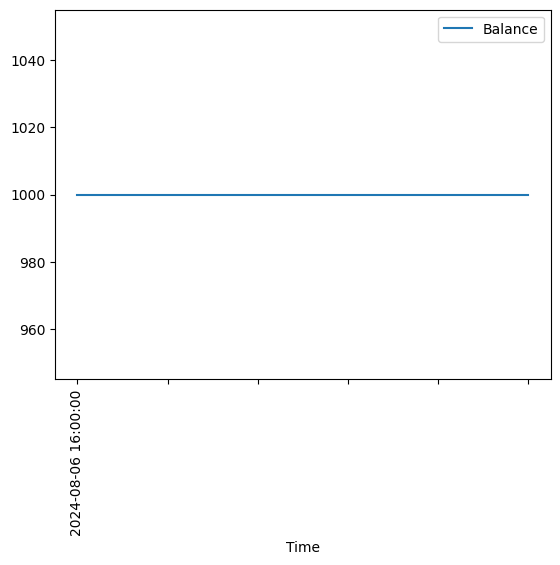

SMA: -1
MACD: 0
RSI: 0
ADX: 0
Momentum: 0
Concencus: -1
Current Balance: 1000 USD and 0 BTC at 2024-08-06 18:00:00


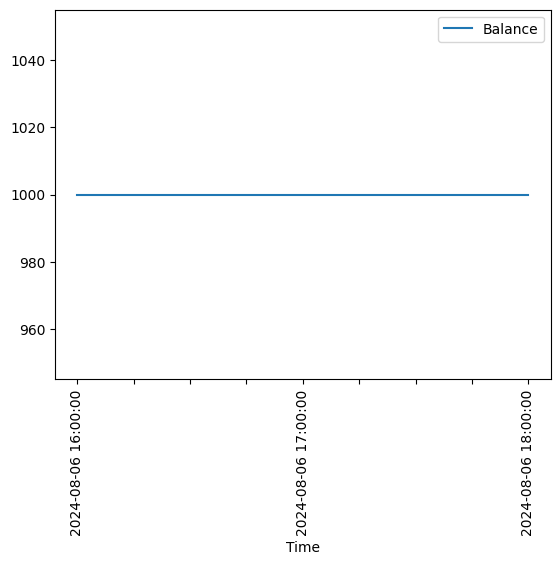

SMA: -1
MACD: 1
RSI: 1
ADX: 0
Momentum: 1
Concencus: 2
Current Balance: 1000 USD and 0 BTC at 2024-08-06 19:00:00


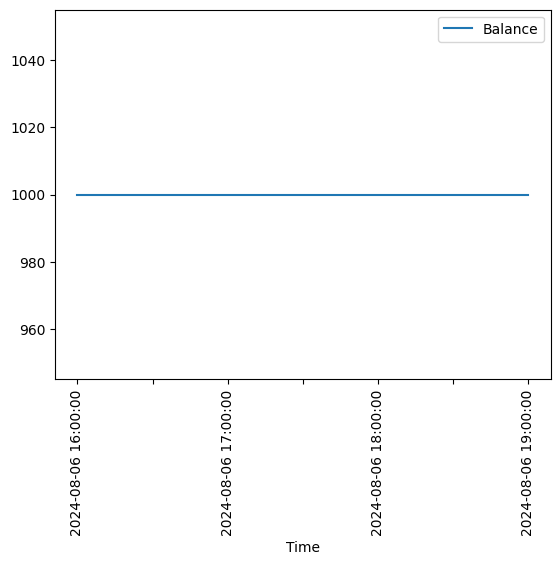

SMA: -1
MACD: 0
RSI: 1
ADX: 0
Momentum: 1
Concencus: 1
Current Balance: 1000 USD and 0 BTC at 2024-08-06 20:00:00


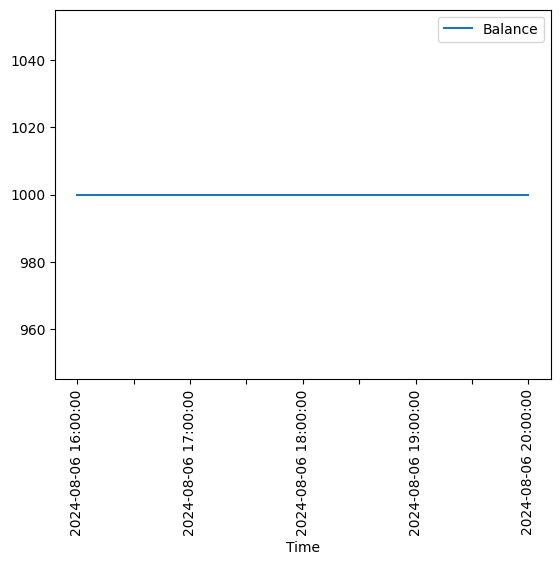

In [15]:
while True:
        # Get new hour data
        hour_data = pd.DataFrame(client.get_historical_klines('BTCUSDT',
                                Client.KLINE_INTERVAL_1HOUR,
                                        str(2) + ' hour ago UTC'))

        # First 6 column represent Time and OHLCV values
        hour_data = hour_data.iloc[:, :6]
        hour_data.columns = ['Time', 'Open', 'High', 'Low', 'Close', 'Volume']

        # Convert first column into datetime
        hour_data['Time'] = pd.to_datetime(hour_data['Time'], unit='ms')
        for column in hour_data.columns:
                if column != 'Time':
                        hour_data[column] = hour_data[column].astype(float)

        # Set Time as index
        hour_data.set_index('Time', inplace=True)

        # Join with old data
        raw_df.drop(raw_df.tail(1).index,inplace=True)
        raw_df = pd.concat([raw_df, hour_data])

        # Get TAs and Trading Signals
        df = get_ta(raw_df)
        df = get_signal(df)

        # Simulate Trade
        if (df.iloc[-2, -1] >= 4) & (open_trade == False):
                coin = (balance / df.iloc[-1,0]) *0.999
                balance = 0
                bought_price = df.iloc[-1,0]
                open_trade = True
        elif (df.iloc[-2, -1] <= -4) & (open_trade == True):
                open_trade = False
                print(f"PnL:{(df.iloc[-1,0]-bought_price)/bought_price * 100}")
                balance = coin * df.iloc[-1,0] *0.999
                coin = 0

        balance_dict[f'{df.index[-1]}'] =  balance + coin*df.iloc[-1,0]
        balance_df = pd.DataFrame.from_dict(balance_dict.items())
        balance_df.columns = ['Time', 'Balance']
        balance_df
        print(f"SMA: {df.iloc[-2,-6]}\nMACD: {df.iloc[-2,-5]}\nRSI: {df.iloc[-2,-4]}\nADX: {df.iloc[-2,-3]}\nMomentum: {df.iloc[-2,-2]}\nConcencus: {df.iloc[-2,-1]}")
        print(f"Current Balance: {balance} USD and {coin} BTC at {df.index[-1]}")
        balance_df.plot(kind='line', x='Time', y='Balance')
        plt.xticks(rotation=90)
        plt.show();

        sleep(3600)
     